## Descent methods

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def q(x):
    c = np.array([2,3])
    Q = np.array([[7,1.5],[1.5,1]])
    f = c@x + x@(Q@x)
    g = 2*Q@x + c
    H = 2*Q
    return f, g, H

### Gradient Descent

Here we use the fact the function is quadratic

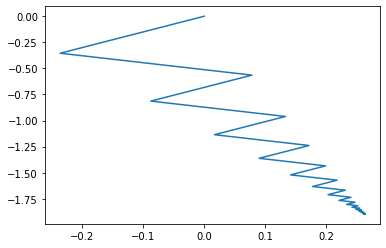

In [ ]:
x = np.array([0,0])
X = [x]
_, g, H = q(x)
tol = 1e-6
while (np.linalg.norm(g) > tol):
    d = -g
    alpha = d@d/(d@(H@d))
    x = x + alpha*d
    X.append(x)
    _, g, H = q(x)

X = np.array(X)
plt.plot(X[:,0],X[:,1])

### Gradient descent with line search

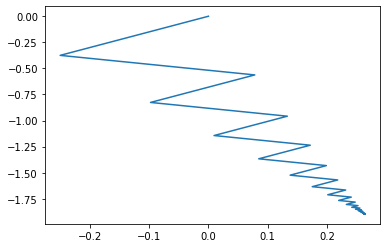

In [ ]:
x = np.array([0,0])
X = [x]
f, g, H = q(x)
tol = 1e-6
eta = 0.25
beta = 0.5

while (np.linalg.norm(g) > tol):
    d = -g
    
    # calculate step length
    alpha = 0.5
    f_alpha, _, _ = q(x+alpha*d)
    while (f_alpha > f + eta*alpha*(d@g)):
        alpha = beta*alpha
        f_alpha, _, _ = q(x+alpha*d)
    
    x = x + alpha*d
    X.append(x)
    f, g, H = q(x)

X = np.array(X)
plt.plot(X[:,0],X[:,1])

In [ ]:
np.size(X)

216

### Conjugate Gradient Descent

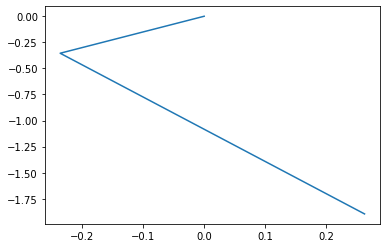

In [ ]:
x = np.array([0,0])
X = [x]
_, g, H = q(x)
d = -g
tol = 1e-6
while (np.linalg.norm(g) > tol):
    alpha = -g@d/(d@(H@d))
    x = x + alpha*d
    X.append(x)
    g_prev = g
    _, g, H = q(x)
    d = -g + (g@g)/(g_prev@g_prev)*d

X = np.array(X)
plt.plot(X[:,0],X[:,1])

### Conjugate gradient with line search

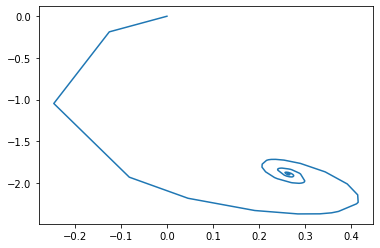

In [ ]:
x = np.array([0,0])
X = [x]
f, g, H = q(x)
d = -g
tol = 1e-6
while (np.linalg.norm(g) > tol):
    
    # calculate step length
    alpha = 1
    f_alpha, _, _ = q(x+alpha*d)
    while (f_alpha > f + eta*alpha*(d@g)):
        alpha = eta*alpha
        f_alpha, _, _ = q(x+alpha*d)
        
    x = x + alpha*d
    X.append(x)
    g_prev = g
    f, g, H = q(x)
    d = -g + (g@g)/(g_prev@g_prev)*d

X = np.array(X)
plt.plot(X[:,0],X[:,1])

### Newton method

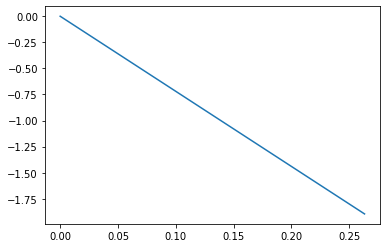

In [ ]:
x = np.array([0,0])
X = [x]
f, g, H = q(x)
tol = 1e-6
while (np.linalg.norm(g) > tol):
    d = -np.linalg.inv(H)@g
    x = x + d
    X.append(x)
    f, g, H = q(x)
    
X = np.array(X)
plt.plot(X[:,0],X[:,1])

In [ ]:
def q(x,gamma):
    c = np.array([2,3])
    Q = np.array([[7,1.5],[1.5,1]])
    f = c@x + x@(Q@x) + gamma*x[0]**3
    g = 2*Q@x + c + np.array([3*gamma*x[0]**2,0])
    H = 2*Q + np.array([[6*gamma*x[0],0],[0,0]])
    return f, g, H

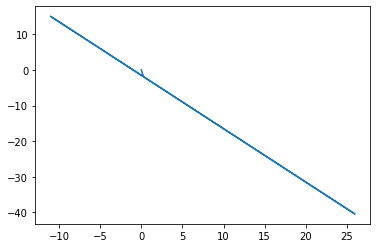

In [ ]:
x = np.array([0,0])
gamma = -5;
X = [x]
f, g, H = q(x,gamma)
tol = 1e-6
count = 0;
while (np.linalg.norm(g) > tol)& (count < 200):
    d = -np.linalg.inv(H)@g
    x = x + d
    X.append(x)
    f, g, H = q(x,gamma)
    count += 1
    
X = np.array(X)
plt.plot(X[:,0],X[:,1])

In [ ]:
def oneDfun(x):
    f = 2*x + x**2 - 3*x**3
    g = 2 + 2*x - 9*x**2
    H = -18*x
    return f, g, H

In [ ]:
y = np.arange(-10,10,0.1)
fy = np.array(oneDfun(y))

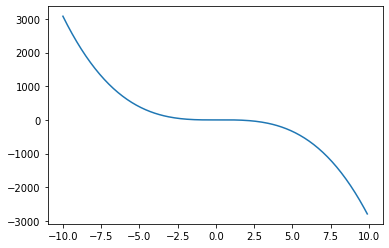

In [ ]:
plt.plot(y,fy[0,:])

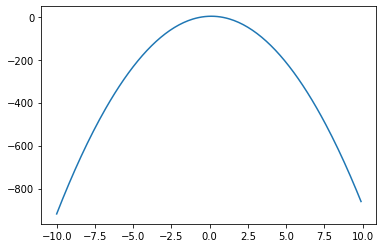

In [ ]:
plt.plot(y,fy[1,:])

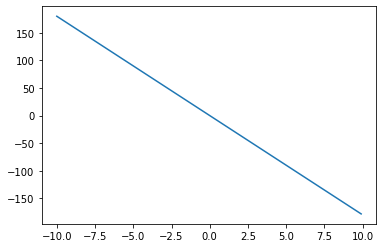

In [ ]:
plt.plot(y,fy[2,:])

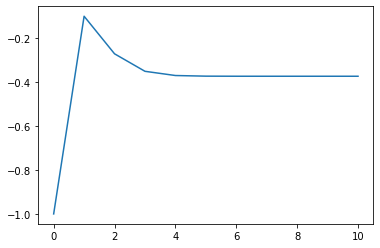

In [ ]:
## Gradient descent for local min

x = -1
X = [x]
f, g, H = oneDfun(x)
tol = 1e-6
eta = 0.25
beta = 0.5
alpha0 = 0.1

while (np.abs(g) > tol):
    # calculate step length
    alpha = alpha0
    f_alpha, _, _ = oneDfun(x-alpha*g)
    while (f_alpha > f - eta*alpha*(g**2)):
        alpha = beta*alpha
        f_alpha, _, _ = oneDfun(x-alpha*g)
    
    x = x - alpha*g
    X.append(x)
    f, g, H = oneDfun(x)

X = np.array(X)

plt.plot(np.arange(0,len(X)),X)

In [ ]:
X

array([-1.        , -0.1       , -0.271     , -0.3507031 , -0.36986908,
       -0.37277244, -0.37315459, -0.37320376, -0.37321007, -0.37321087,
       -0.37321098])

In [ ]:
# Solution of the first order condition
# f'(x) = 2 + 2x - 9x^2 = 0

y1 = (2 + np.sqrt(76))/18
y2 = (2 - np.sqrt(76))/18

f1, g1, h1 = oneDfun(y1)
f2, g2, h2 = oneDfun(y2)



In [ ]:
[y1,f1,g1,h1]

[0.5954332159489638,
 0.9120911928170602,
 -4.440892098500626e-16,
 -10.717797887081348]

In [ ]:
[y2,f2,g2,h2]

[-0.37321099372674155,
 -0.4511858430228214,
 -4.440892098500626e-16,
 6.717797887081348]

In [ ]:
x = 1
f, g, H = oneDfun(x)

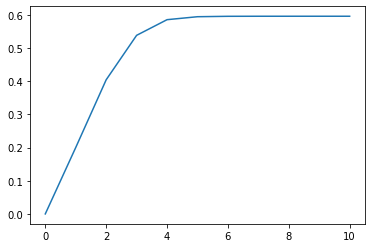

In [ ]:
## Gradient ascent for local max

x = 0
X = [x]
f, g, H = oneDfun(x)
tol = 1e-6
eta = 0.25
beta = 0.5
alpha0 = 0.1

while (np.abs(g) > tol):
    # calculate step length
    alpha = alpha0
    f_alpha, _, _ = oneDfun(x+alpha*g)
    while (f_alpha - f < eta*alpha*(g**2)):
        alpha = beta*alpha
        f_alpha, _, _ = oneDfun(x-alpha*g)
    
    x = x + alpha*g
    X.append(x)
    f, g, H = oneDfun(x)

X = np.array(X)

plt.plot(np.arange(0,len(X)),X)

In [ ]:
X